<a href="https://colab.research.google.com/github/VentesWorks/pythonKakfaWrapper/blob/master/L_Sub_industry_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from tqdm.notebook import tqdm
!pip install transformers
from transformers import BertTokenizer
from torch.utils.data import TensorDataset

from transformers import BertForSequenceClassification

     |████████████████████████████████| 1.8MB 8.3MB/s 
     |████████████████████████████████| 890kB 51.3MB/s 
     |████████████████████████████████| 2.9MB 55.0MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=658f9ead5dde5378b3e6ed7a9672d9b3e5fd197bfceec1e0d698e2077afb60b2
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import os
import json
import sys
from datetime import datetime
import tensorflow as tf

In [ ]:
df = pd.read_csv('1001.csv',sep=";",encoding="latin-1")

In [ ]:
df

,desc_clean,industry_code,sub_industry_code
0,construction,1001,1001-14
1,life coaching,1001,1001-4
2,completed later,1001,1001-10
3,consulting firm,1001,1001-4
4,medical billing,1001,1001-2
...,...,...,...
11836,paul pate cedar rapid elected serve thirty sec...,1001,1001-5
11837,since founding university kansa embodied aspir...,1001,1001-5
11838,leighfisher leader aviation consulting sector ...,1001,1001-12
11839,northern arizona university mission provide ou...,1001,1001-5


In [ ]:
possible_labels = df.sub_industry_code.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{'1001-1': 0,
 '1001-10': 1,
 '1001-11': 2,
 '1001-12': 3,
 '1001-13': 4,
 '1001-14': 5,
 '1001-2': 6,
 '1001-3': 7,
 '1001-4': 8,
 '1001-5': 9,
 '1001-6': 10,
 '1001-7': 11,
 '1001-8': 12,
 '1001-9': 13,
 '1005-1': 52,
 '1005-2': 53,
 '1005-5': 54,
 '1005-6': 55,
 '1005-7': 56,
 '1006-1': 57,
 '1006-2': 58,
 '1006-3': 59,
 '1006-4': 60,
 '1006-5': 61,
 '1006-6': 62,
 '1007-1': 27,
 '1007-2': 28,
 '1007-3': 29,
 '1007-4': 30,
 '1007-5': 31,
 '1008-1': 47,
 '1008-2': 48,
 '1008-3': 49,
 '1008-4': 50,
 '1008-5': 51,
 '1017-1': 17,
 '1017-2': 16,
 '1018-1': 37,
 '1018-10': 38,
 '1018-2': 39,
 '1018-3': 40,
 '1018-4': 41,
 '1018-5': 42,
 '1018-6': 43,
 '1018-7': 44,
 '1018-8': 45,
 '1018-9': 46,
 '1020-1': 32,
 '1020-2': 33,
 '1020-3': 34,
 '1020-4': 35,
 '1020-5': 36,
 '1021-1': 23,
 '1021-2': 24,
 '1021-3': 25,
 '1021-4': 26,
 '1023-1': 14,
 '1023-3': 15,
 '1026-1': 18,
 '1026-2': 19,
 '1026-3': 20,
 '1026-4': 21,
 '1026-5': 22}

In [ ]:
df['label'] = df.sub_industry_code.replace(label_dict)

In [ ]:
df

,desc_clean,industry_code,sub_industry_code,label
0,corporate communication,1001,1001-1,0
1,market research analysis,1001,1001-1,0
2,design make brand look good,1001,1001-1,0
3,customer satisfaction survey,1001,1001-1,0
4,marketing consulting service,1001,1001-1,0
...,...,...,...,...
34462,johnson music seth johnson elementary school m...,1006,1006-6,62
34463,record label music shrapnel record inc music b...,1006,1006-6,62
34464,chamber music bay area world music music conce...,1006,1006-6,62
34465,event digital audio music entertainment vitami...,1006,1006-6,62


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


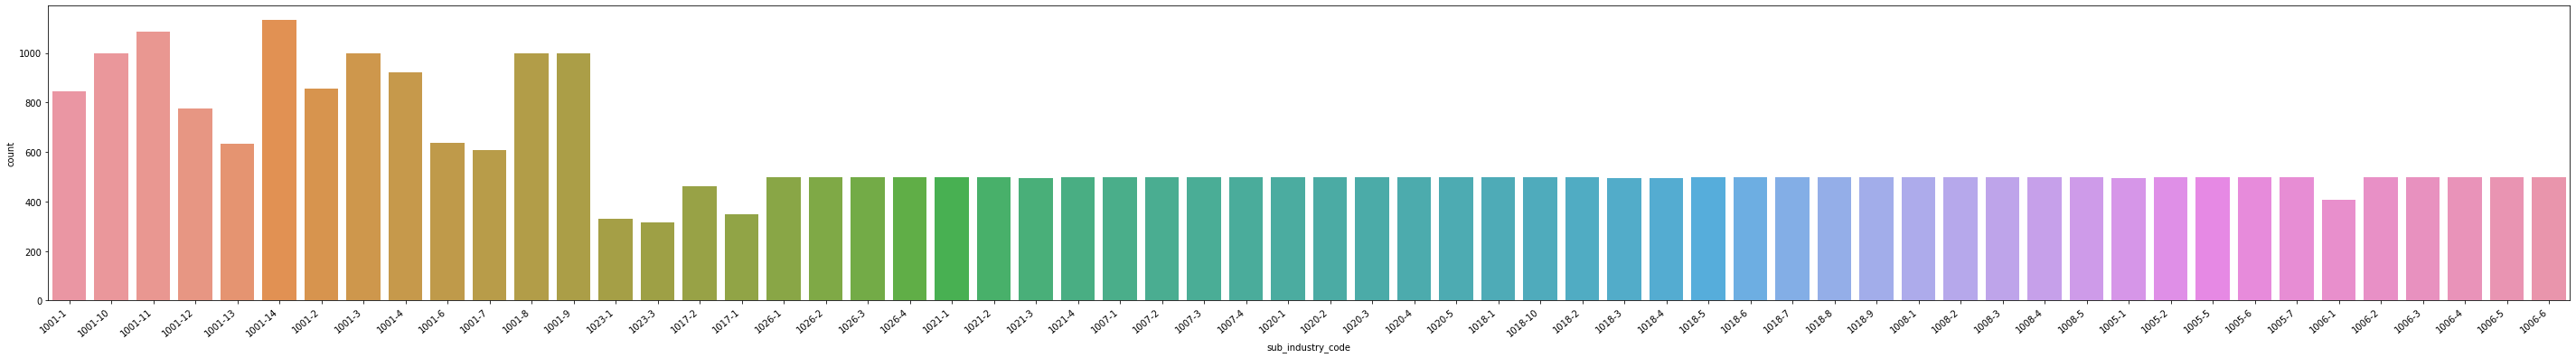

Text(0.5, 0, 'review score')

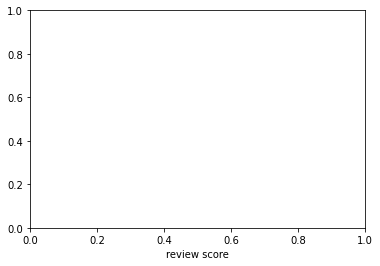

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(50, 6))
ax =sns.countplot(df.sub_industry_code)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()
plt.xlabel('review score')

In [ ]:
df = df[df.sub_industry_code != '1026-5']

In [ ]:
#['1007-5','1024-5','1026-5','1023-2','1014-3']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df.index.values, 
                                                  df.label.values, 
                                                  test_size=0.15, 
                                                  random_state=42, 
                                                  stratify=df.label.values)

In [ ]:
df['data_type'] = ['not_set']*df.shape[0]
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'
df.groupby(['label', 'data_type']).count()

desc_clean  industry_code  sub_industry_code
label data_type                                              
0     train             718            718                718
      val               127            127                127
1     train             849            849                849
      val               150            150                150
2     train             923            923                923
...                     ...            ...                ...
60    val                75             75                 75
61    train             424            424                424
      val                75             75                 75
62    train             424            424                424
      val                75             75                 75

[120 rows x 3 columns]

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', 
                                          do_lower_case=True)

In [ ]:
df['desc_clean'].isnull().sum()

0

In [ ]:
df['desc_clean'].replace('', np.nan, inplace=True)

In [ ]:
df.dropna(subset=['desc_clean'], inplace=True)

In [ ]:
token_lens = []

for txt in df.desc_clean:
  tokens = tokenizer.encode(txt, max_length=512)
  token_lens.append(len(tokens))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


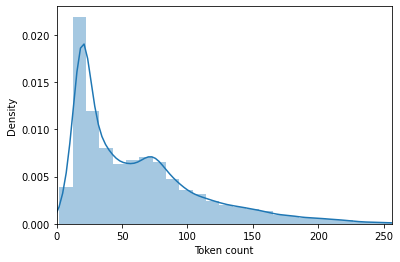

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(token_lens)
plt.xlim([0, 256]);
plt.xlabel('Token count');

In [ ]:
encoded_data_train = tokenizer.batch_encode_plus(
    df[df.data_type=='train'].desc_clean.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    df[df.data_type=='val'].desc_clean.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)


input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type=='train'].label.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(df[df.data_type=='val'].label.values)

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2143: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 32

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)


In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),
                  lr=1e-5, 
                  eps=1e-8)

In [ ]:
epochs = 8

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def cr(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return classification_report(labels_flat, preds_flat)

def c_m(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return confusion_matrix(labels_flat, preds_flat)

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}'+ ';'+f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')
        #print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')




In [ ]:
import random

seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(device)

cuda


In [ ]:
def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0


    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    torch.save(model.state_dict(), f'finetuned_BERT_epoch_{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')


Epoch 1
Training loss: 2.915709090546902
Validation loss: 1.9119773844014043
F1 Score (Weighted): 0.6191083987853409


KeyboardInterrupt: ignored

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

model.to(device)

In [ ]:
model.load_state_dict(torch.load('finetuned_BERT_epoch_6.model', map_location=torch.device('cuda')))


_, predictions, true_vals = evaluate(dataloader_validation)


In [ ]:
accuracy_per_class(predictions, true_vals)


In [ ]:
'1001-1': 13,
 '1001-10': 2,
 '1001-11': 9,
 '1001-12': 6,
 '1001-13': 10,
 '1001-14': 0,
 '1001-2': 3,
 '1001-3': 12,
 '1001-4': 1,
 '1001-5': 11,
 '1001-6': 8,
 '1001-7': 7,
 '1001-8': 5,
 '1001-9': 4

In [ ]:
print(cr(predictions, true_vals))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73       127
           1       0.91      0.83      0.87       150
           2       0.62      0.66      0.64       163
           3       0.59      0.60      0.60       116
           4       0.81      0.80      0.80        95
           5       0.78      0.79      0.79       170
           6       0.70      0.72      0.71       128
           7       0.71      0.74      0.73       150
           8       0.61      0.59      0.60       138
          10       0.53      0.53      0.53        95
          11       0.60      0.75      0.66        91
          12       0.78      0.77      0.77       149
          13       0.72      0.77      0.74       150
          14       1.00      0.98      0.99        50
          15       1.00      0.96      0.98        47
          16       0.88      0.77      0.82        69
          17       0.90      0.88      0.89        52
          18       0.81    

In [ ]:
'1001-1': 13,
 '1001-10': 2,
 '1001-11': 9,
 '1001-12': 6,
 '1001-13': 10,
 '1001-14': 0,
 '1001-2': 3,
 '1001-3': 12,
 '1001-4': 1,
 '1001-5': 11,
 '1001-6': 8,
 '1001-7': 7,
 '1001-8': 5,
 '1001-9': 4

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5, 45.5, 46.5, 47.5, 48.5, 49.5, 50.5, 51.5, 52.5, 53.5, 54.5,
        55.5, 56.5, 57.5, 58.5, 59.5]),
 <a list of 60 Text major ticklabel objects>)

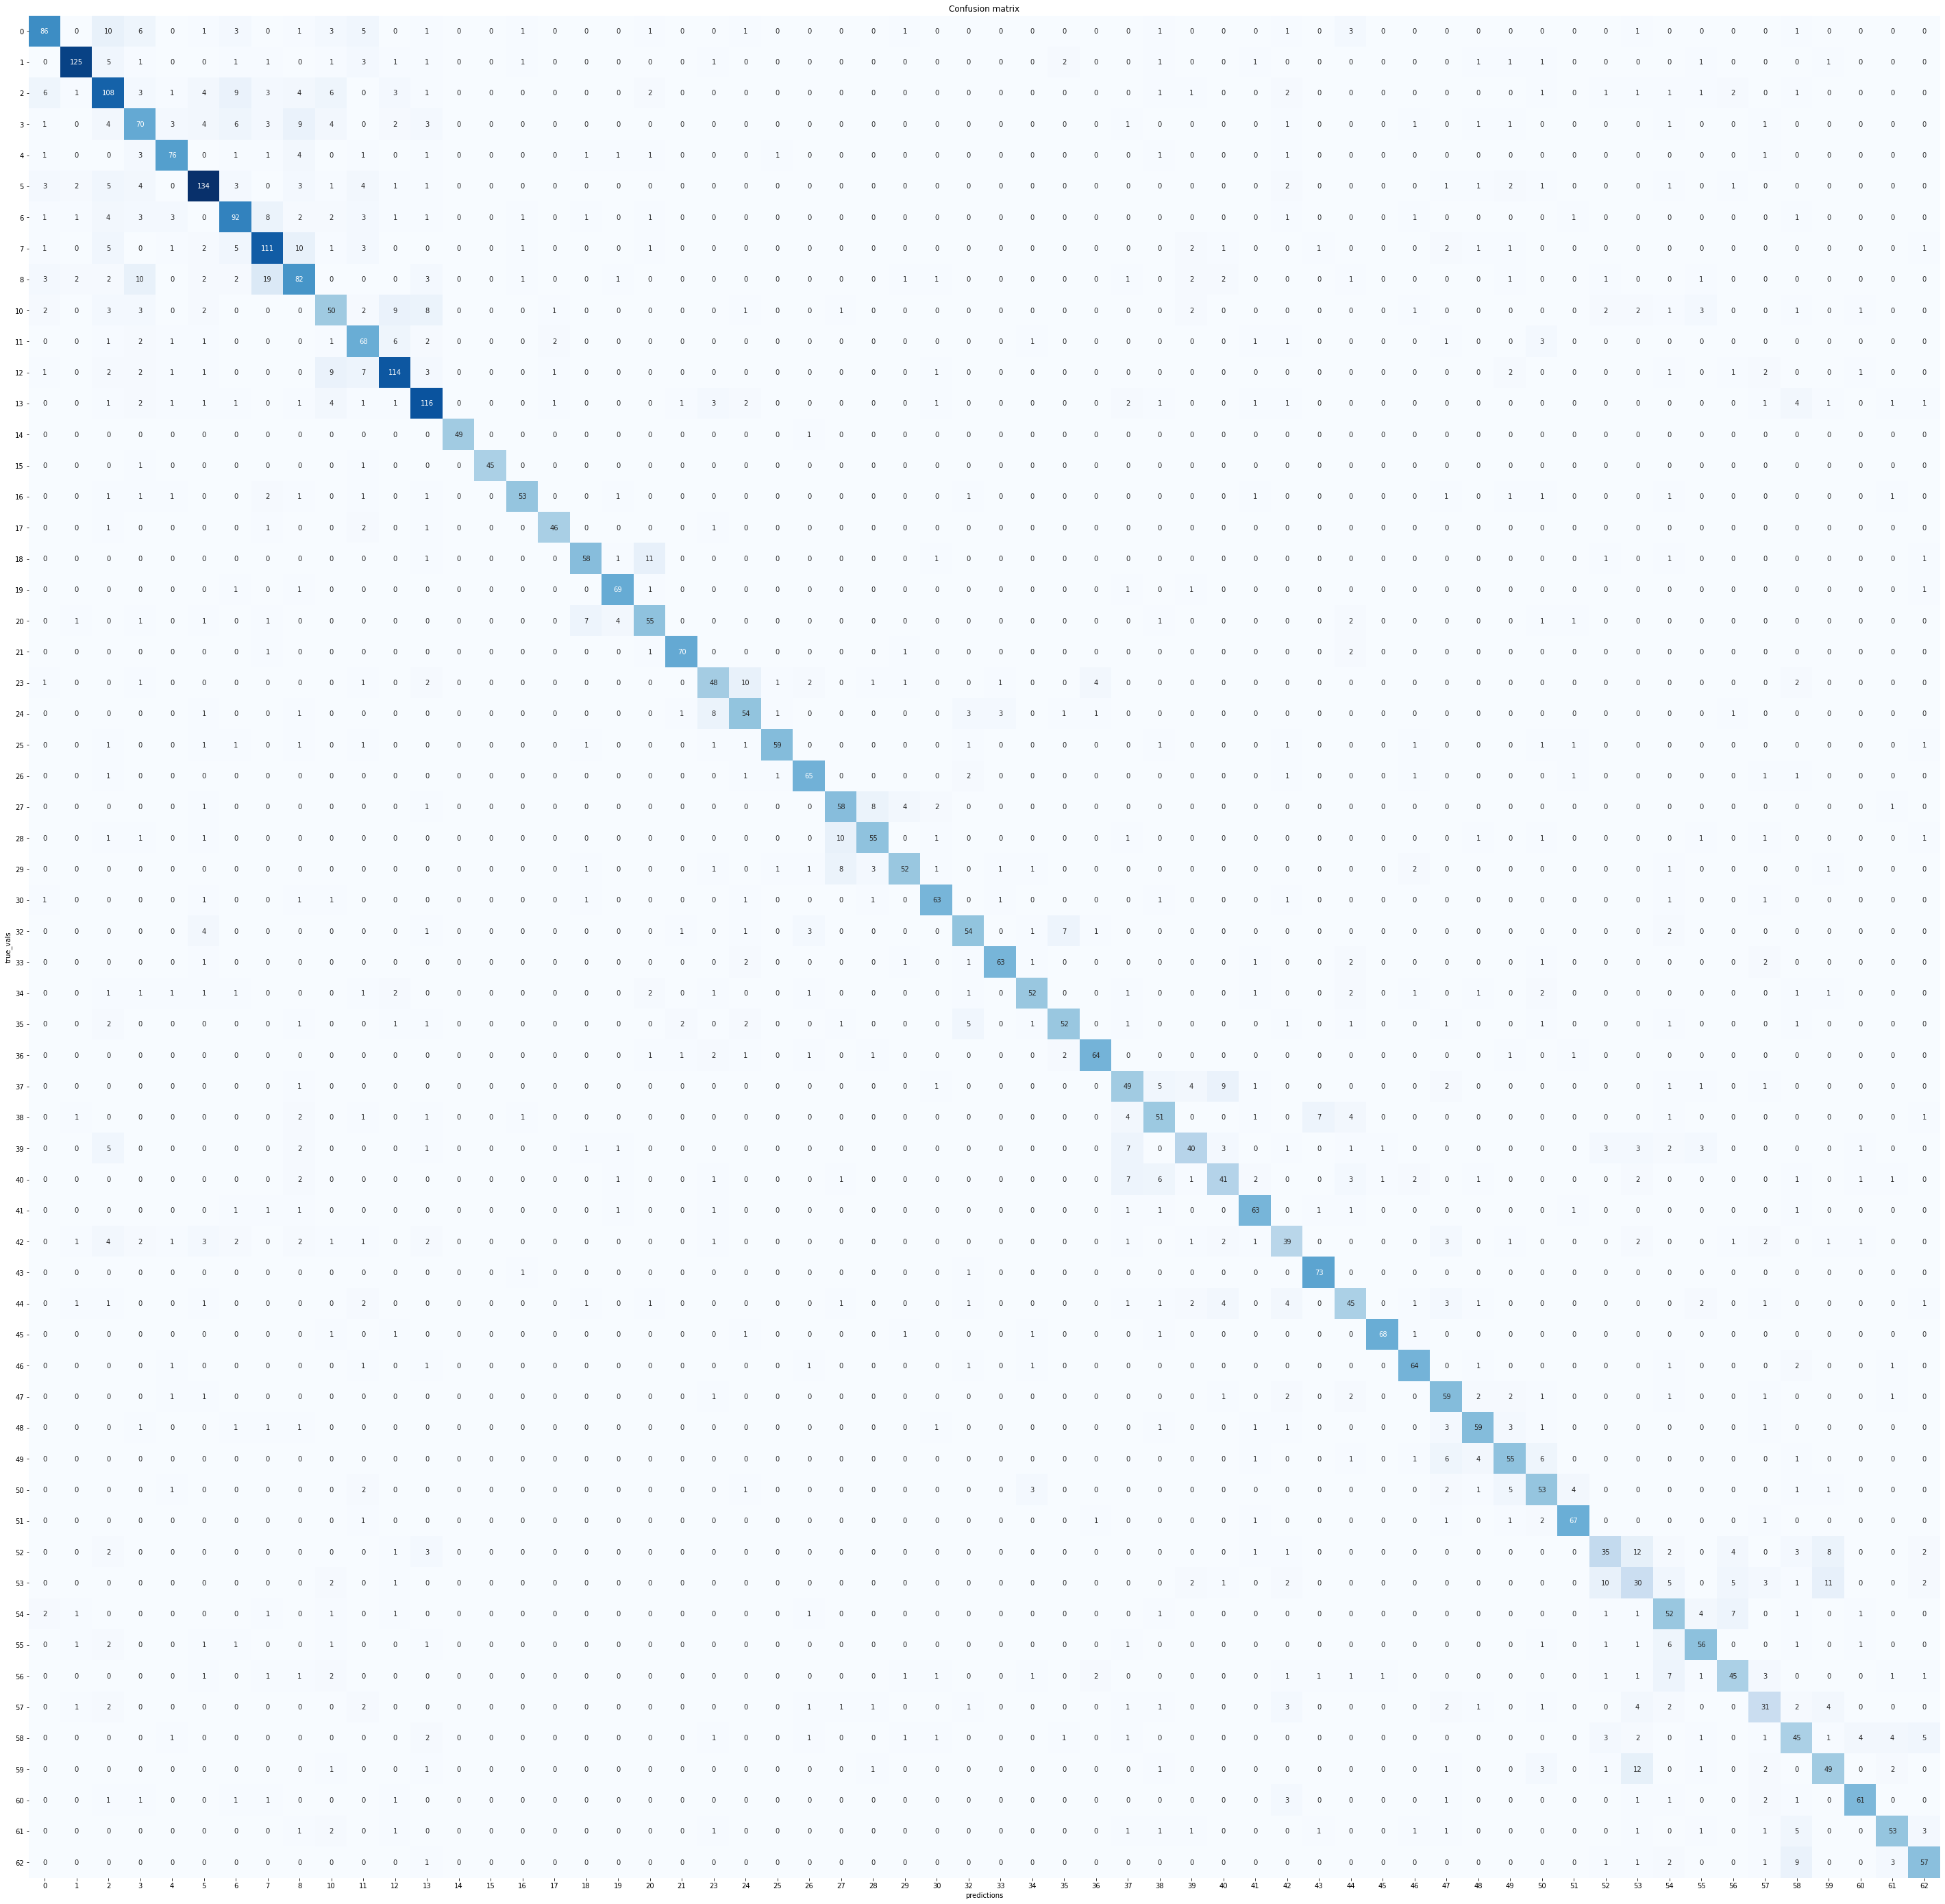

In [ ]:
## Plot confusion matrix
def c_m(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return confusion_matrix(labels_flat, preds_flat)

classes = np.unique(true_vals)
from sklearn import metrics
cm = c_m(predictions, true_vals)
fig, ax = plt.subplots(figsize=(50, 50))
#plt.figure(figsize=(50, 6))

sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="predictions", ylabel="true_vals", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

In [ ]:
# Get some data:
#ata_leadBook = data_leadBook.sample(20)
texts = ['graphic design print web']
real = ['1001-11']
#true_labels = sample['label'].to_list()
# Tokenise the texts and run the model:
inputs = tokenizer(texts, padding='max_length', return_tensors='pt')

In [ ]:
model.eval()
torch.device("cuda" if torch.cuda.is_available() else "cpu"); 
inputs.to(device)

with torch.no_grad():outputs = model(**inputs)
# Get the predicted labels
pred_labels = np.argmax(outputs[0].cpu().detach().numpy(), axis=1).tolist()
pred_labels



[3]

[9]

In [ ]:
label_dict1 ={13: '1001-1',
 2: '1001-10',
 9:'1001-11'}

[6]